# Lab 3

## Principal Component Analysis

In [61]:
import csv, numpy, matplotlib.pyplot as plt

In [63]:
def vcol(vec):
    return vec.reshape(vec.shape[0], 1)

def vrow(vec):
    return vec.reshape(1, vec.shape[0])

In [64]:
def loadValues(filename):
    data = []
    labels = []
    # Open the CSV file
    with open(filename) as file:
        reader = csv.reader(file)
        # Loop through rows
        for row in reader:
            data.append(row[0:4])
            if(row[4]=="Iris-setosa"): labels.append(0)
            elif (row[4]=="Iris-versicolor"): labels.append(1)
            elif (row[4]=="Iris-virginica"): labels.append(2)

    return numpy.array(data, dtype=numpy.float64).T, numpy.array(labels, dtype=numpy.float64)

D, L = loadValues("../iris.csv")

print("first element: " + str(D[:, 0]) + ", label: " + str(L[0]))

first element: [5.1 3.5 1.4 0.2], label: 0.0


In [75]:
def compute_mu_C(Matrix):
    mu = vcol(D.mean(1)) #compute mean
    DC = D - mu #center data
    C = DC@DC.T / D.shape[1] #compute covariance matrix
    return mu, C

def PCA_projection(Matrix, m):
    mu, C = compute_mu_C(Matrix)
    s, U = numpy.linalg.eigh(C) #compute eigenvalues and eigenvectors
    P = U[:, ::-1][:, 0:m] #select the first m eigenvectors with the highest eigenvalues
    DP = numpy.dot(P.T, D) #project the data

    return DP

DP = PCA_projection(D, 2)
#PCA[:, 0]

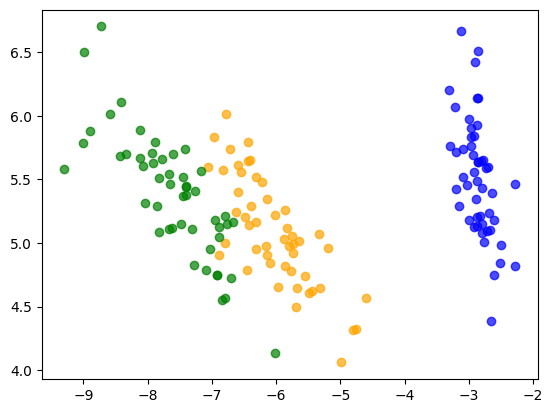

In [76]:
DP0 = DP[:, L==0]
DP1 = DP[:, L==1]
DP2 = DP[:, L==2]

plt.scatter(DP0[0], DP0[1], color='blue', marker='o', alpha=0.7)
plt.scatter(DP1[0], DP1[1], color='orange', marker='o', alpha=0.7)
plt.scatter(DP2[0], DP2[1], color='green', marker='o', alpha=0.7)

(array([ 3.,  2.,  4.,  4.,  9., 10.,  6., 10.,  1.,  1.]),
 array([-9.29801055, -8.97056924, -8.64312792, -8.3156866 , -7.98824528,
        -7.66080397, -7.33336265, -7.00592133, -6.67848001, -6.35103869,
        -6.02359738]),
 <BarContainer object of 10 artists>)

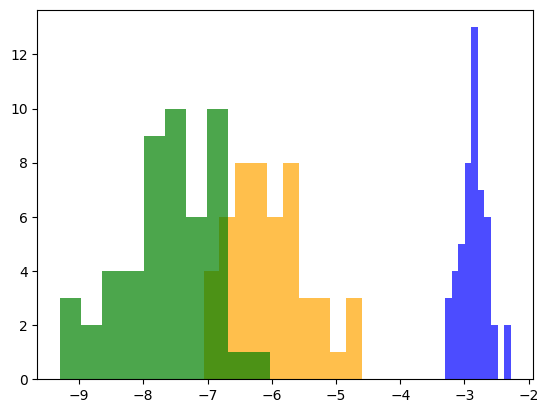

In [78]:
plt.hist(DP0[0], color='blue', alpha=0.7)
plt.hist(DP1[0], color='orange', alpha=0.7)
plt.hist(DP2[0], color='green', alpha=0.7)